In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# parameters below can be set to any combination of these options for maximum effectiveness.
# model can still predict if values are not set correctly.  Capitalization does matter.

# client options [2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 121, 122, 123, 138, 140]
# seasongroup options ["Full Year", "Group Sales", "Haunt", "Resorts", "Season Pass Experience", "Winterfest"]
# funnel options ["Conversion"]
# mediatype options ["Audio", "Display_Desck", "Display_Direct", "Facebook", "FBIG", "Instagram", 
#                    "Paid Search: Brand Keywords", "Paid Social Other", "Video_FEP", "Video_Preroll_Desck"
#                    "Video_Preroll_Direct", "YouTube"

# set parameters here.

start_date='2022-10-01' #YYYY-MM-DD
end_date='2022-10-31' #YYYY-MM-DD
client=3
seasongroup="Haunt"
funnel="Conversion"  # only the conversion model exists in this application.
mediatype="Facebook"
spend=4000 # any integer works.  Values should be reasonable
impressions=350000 # any integer works.  Values should be reasonable

date_time_obj1 = datetime.strptime(start_date, '%Y-%m-%d')
date_time_obj2 = datetime.strptime(end_date, '%Y-%m-%d')

delta = date_time_obj2-date_time_obj1

delta_days = delta.days
media_days = delta.days + 1

#resp = requests.get(url=url, params=params)


In [2]:
media_days

31

In [3]:
url = 'https://ad-forecasting-nu-prod.uc.r.appspot.com/'
url += '?start_date={0}&end_date={1}'
url += '&client={2}&seasongroup="{3}"'
url += '&funnel="{4}"&mediatype="{5}"'
url += '&spend={6}&impressions={7}'

url_str = url.format(start_date,
                     end_date,
                     client,
                     seasongroup,
                     funnel,
                     mediatype,
                     spend,
                     impressions
                    )

In [4]:
url_str

'https://ad-forecasting-nu-prod.uc.r.appspot.com/?start_date=2022-10-01&end_date=2022-10-31&client=3&seasongroup="Haunt"&funnel="Conversion"&mediatype="Facebook"&spend=4000&impressions=350000'

In [5]:
resp = requests.get(url=url_str)
data = resp.json() # Check the JSON Response Content documentation below

In [6]:
data

{'total_prediction': 179786.7142857143,
 'dates': ['2022-10-01',
  '2022-10-02',
  '2022-10-03',
  '2022-10-04',
  '2022-10-05',
  '2022-10-06',
  '2022-10-07'],
 'daily_prediction': [7309, 7309, 5195, 5195, 5195, 5195, 5195]}

In [7]:
ttl_pred_val = data['total_prediction']


In [8]:
dates = data['dates']
predictions = data['daily_prediction']

In [9]:
zipped_data = zip(dates, predictions)

df = pd.DataFrame(zipped_data, columns=['dates','predicted_value'])
df['dates'] = pd.to_datetime(df['dates'])

df['days'] = df['dates'].dt.day_name()

In [10]:
df.head(7)

,dates,predicted_value,days
0,2022-10-01,7309,Saturday
1,2022-10-02,7309,Sunday
2,2022-10-03,5195,Monday
3,2022-10-04,5195,Tuesday
4,2022-10-05,5195,Wednesday
5,2022-10-06,5195,Thursday
6,2022-10-07,5195,Friday


Total Budget: $4000
CPM during plan: $0.09
ROAS: $44.95


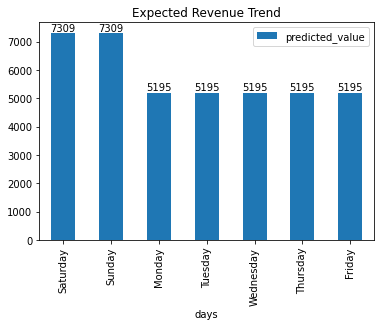

In [11]:
total_budget = spend
cpm = (impressions/1000)/spend
roas = ttl_pred_val/spend




print('Total Budget: ${0}'.format(total_budget))
print('CPM during plan: ${0}'.format(round(cpm,2)))
print('ROAS: ${0}'.format(round(roas,2)))
ax = df.plot.bar('days', 'predicted_value', title='Expected Revenue Trend')
for container in ax.containers:
    ax.bar_label(container)
plt.show()